# US Population Dataset

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AR, ARResults
from statsmodels.tsa.ar_model import AutoReg

df = pd.read_csv('C:/Users/Jorge/Documents/GitHub/curso-series-temporales/5. Modelos AR autorregresivos/Python/uspopulation.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'

C:\Users\Jorge\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


## Gráfico de la serie

[Text(0, 0.5, 'Pop. Est. (Thousands)')]

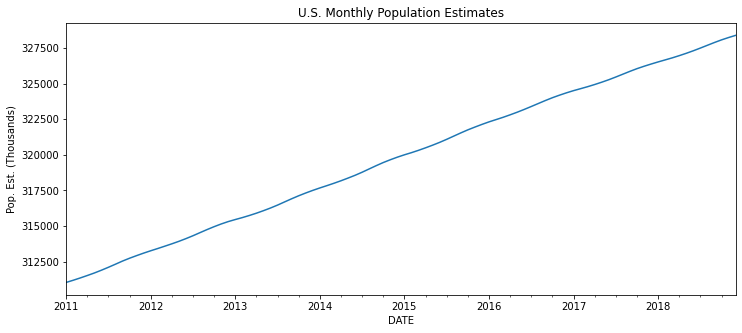

In [3]:
title = 'U.S. Monthly Population Estimates'
ylabel = 'Pop. Est. (Thousands)'

ax = df['PopEst'].plot(figsize = (12,5),title = title);
ax.autoscale(axis='x',tight=True)
ax.set(ylabel =ylabel)

## Datos de entrenamiento/prueba

In [4]:
len(df)
train = df.iloc[:84]
test = df.iloc [84:]

## Modelo AR(1)

In [93]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

In [94]:
model = AR(train['PopEst'])
AR1fit = model.fit(maxlags = 1,methods='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients: \n{AR1fit.params}')

NotImplementedError: AR has been removed from statsmodels and replaced with statsmodels.tsa.ar_model.AutoReg.

In [91]:
model = SARIMAX(train['PopEst'], order = (1,0,0))
AR1fit = model.fit()
print(f'Lag: {AR1fit.k_constant}')
print(f'Coefficients: \n{AR1fit.params}')
AR1fit.summary()

Lag: 0
Coefficients: 
ar.L1         1.000000
sigma2    35086.886663
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 PopEst   No. Observations:                   84
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -565.863
Date:                Thu, 27 Jan 2022   AIC                           1135.726
Time:                        22:47:52   BIC                           1140.588
Sample:                    01-01-2011   HQIC                          1137.681
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000    8.9e-07   1.12e+06      0.000       1.000       1.000
sigma2      3.509e+04   7.78e-18   4.51e+21      0.000    3.51e+04    3.51e+04
===================================================================================
Ljung-Box (L1) (Q):                  48.50   Jarque-Bera (JB):                 2.22
Prob(Q):                              0.00   Prob(JB):                         0.33
Heteroskedasticity (H):               0.98   Skew:                             0.11
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""